In [1]:
import matplotlib.pyplot as plt                                                    #import essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
import os
path = r"C:\Users\sou\0Summerproject\Untitled Folder"             #specifying path to the directory
os.chdir(path)
os.getcwd()

'C:\\Users\\sou\\0Summerproject\\Untitled Folder'

In [4]:
dataset=np.loadtxt("dataexp.csv", delimiter="\t")                     #loading the data file
x=dataset[:,0:3]
y=dataset[:,3]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y)          #split the training data and validation data

In [8]:
model = Sequential()                                               #model creation and addition of layers
model.add(Dense(14, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                56        
_________________________________________________________________
dense_1 (Dense)              (None, 11)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Instructions for updating:
Use tf.cast instead.


In [10]:
history = model.fit(X_train, y_train, epochs=200, batch_size=20,  verbose=1, validation_split=0.2)   #trraining the data

Train on 6000 samples, validate on 1500 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
6000/6000 [==============================] - 2s 363us/sample - loss: 41.8322 - mean_squared_error: 41.8322 - mean_absolute_error: 4.2489 - val_loss: 0.9140 - val_mean_squared_error: 0.9140 - val_mean_absolute_error: 0.7802
Epoch 2/200
6000/6000 [==============================] - 2s 261us/sample - loss: 0.5608 - mean_squared_error: 0.5608 - mean_absolute_error: 0.6025 - val_loss: 0.3297 - val_mean_squared_error: 0.3297 - val_mean_absolute_error: 0.4596
Epoch 3/200
6000/6000 [==============================] - 2s 259us/sample - loss: 0.2147 - mean_squared_error: 0.2147 - mean_absolute_error: 0.3685 - val_loss: 0.1188 - val_mean_squared_error: 0.1188 - val_mean_absolute_error: 0.2760
Epoch 4/200
6000/6000 [==============================] - 2s 263us/sample - loss: 0.0393 - mean_squared_error: 0.0393 - mean_absolute_error: 0.1321 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - va

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


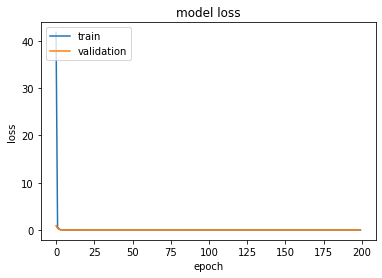

In [11]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
from keras.models import load_model           #saving the model

model.save('modelexp200.h5')  # creates a HDF5 file 


array([ 8.99462642, 12.56647332, 11.08130708, ..., 12.76801337,
       10.51495067, 17.943952  ])